# Pandas Data Visualization Exercise

This is just a quick exercise for you to review the various plots we showed earlier. Use **df3** to replicate the following plots. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df3 = pd.read_csv('LoR-CCChurn.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244057 entries, 0 to 244056
Data columns (total 17 columns):
cust_id                   244057 non-null int64
Churn_Flag                244057 non-null object
Churn_Num                 244057 non-null int64
Average_Daily_Balance     244057 non-null int64
Interest_Paid             244057 non-null float64
Cash_Advances             244057 non-null int64
Balance_Transferred       244057 non-null float64
Marital_Status            244057 non-null object
Occupation_Group          244057 non-null object
Age_of_Account__Months    244057 non-null object
Age_Group                 244057 non-null object
LTV_Group                 244057 non-null object
Bill_Cycle                244057 non-null int64
Customer_Type             244057 non-null object
Gender                    244057 non-null object
Customer_Value            244057 non-null float64
Credit_Limit              244057 non-null int64
dtypes: float64(3), int64(6), object(8)
memory usage: 31.7+

In [3]:
df3.head()

,cust_id,Churn_Flag,Churn_Num,Average_Daily_Balance,Interest_Paid,Cash_Advances,Balance_Transferred,Marital_Status,Occupation_Group,Age_of_Account__Months,Age_Group,LTV_Group,Bill_Cycle,Customer_Type,Gender,Customer_Value,Credit_Limit
0,95454,Y,1,12300,16809.990,14212,7035.285,Married,Export,38,49,Very_Bad,4,SMCOA,M,11922.6375,6000
1,13800,N,0,25206,16803.975,7038,2529.275,Married,Others,70,.,Good,25,ORDRY,M,9666.6250,17000
2,18486,N,0,20163,16802.550,4449,1348.745,Married,Computers,.,.,Others,11,SMCOA,M,9075.6475,6000
3,137302,N,0,25203,16802.025,1317,626.130,Other,Other,30,.,Good,4,ORDRY,U,8714.0775,7000
4,179235,N,0,12294,16801.845,0,0.000,Other,Other,24,.,Good,4,ORDRY,U,8400.9225,2000


In [19]:
df3['Age_Group'] = pd.to_numeric(df3['Age_Group'], errors='coerce')
df3['Age_of_Account__Months'] = pd.to_numeric(df3['Age_of_Account__Months'], errors='coerce')


df3['Age_Group'].fillna(method='ffill', inplace=True) 
df3['Age_of_Account__Months'].fillna(method='ffill', inplace=True)

In [20]:
df3['churn'] = df3['Churn_Flag'].map({'Y':1, 'N':0})

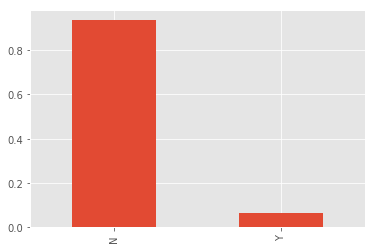

In [37]:
df3['Churn_Flag'].value_counts(normalize=True).plot(kind='bar')

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244057 entries, 0 to 244056
Data columns (total 18 columns):
cust_id                   244057 non-null int64
Churn_Flag                244057 non-null object
Churn_Num                 244057 non-null int64
Average_Daily_Balance     244057 non-null int64
Interest_Paid             244057 non-null float64
Cash_Advances             244057 non-null int64
Balance_Transferred       244057 non-null float64
Marital_Status            244057 non-null object
Occupation_Group          244057 non-null object
Age_of_Account__Months    244057 non-null float64
Age_Group                 244057 non-null float64
LTV_Group                 244057 non-null object
Bill_Cycle                244057 non-null int64
Customer_Type             244057 non-null object
Gender                    244057 non-null object
Customer_Value            244057 non-null float64
Credit_Limit              244057 non-null int64
churn                     244057 non-null int64
dtypes: f

** Recreate this scatter plot of b vs a. Note the color and size of the points. Also note the figure size. See if you can figure out how to stretch it in a similar fashion. Remeber back to your matplotlib lecture...**

In [23]:
df3['Marital_Status'].value_counts()

Other        156860
Married       79989
Unmarried      7203
F                 3
N                 2
Name: Marital_Status, dtype: int64

In [24]:
df3['Marital_Status'] = df3['Marital_Status'].replace(['F', 'N'], 'Other')

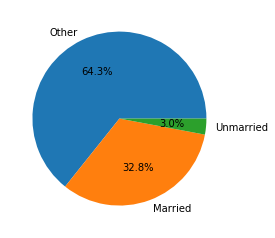

In [25]:
ms = df3['Marital_Status'].value_counts()
msl = ms.index.tolist()

plt.pie(ms, labels=msl, autopct='%1.1f%%')
plt.show()

** Create a histogram of the 'a' column.**

In [26]:
df3['Interest_Paid'].describe()

count    244057.000000
mean        957.962583
std        1853.689582
min           0.000000
25%          47.505000
50%         229.245000
75%         946.500000
max       16809.990000
Name: Interest_Paid, dtype: float64

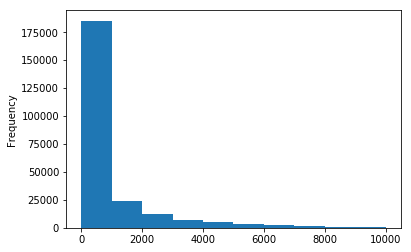

In [27]:
df4 = df3[df3['Interest_Paid']<=10000]
df4['Interest_Paid'].plot.hist()

** These plots are okay, but they don't look very polished. Use style sheets to set the style to 'ggplot' and redo the histogram from above. Also figure out how to add more bins to it.***

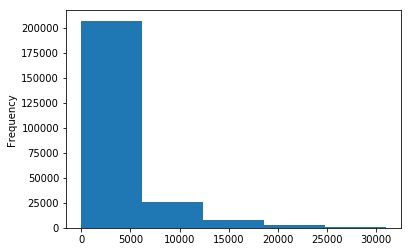

In [28]:
df4 = df3[df3['Average_Daily_Balance']<35000]
df4['Average_Daily_Balance'].plot.hist(bins=5)

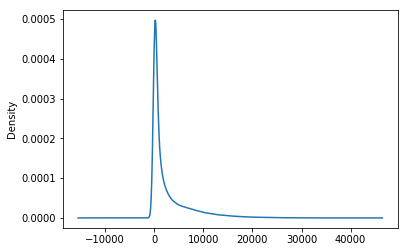

In [29]:
df4['Average_Daily_Balance'].plot.kde()

In [30]:
plt.style.use('ggplot')

** Create a boxplot comparing the a and b columns.**

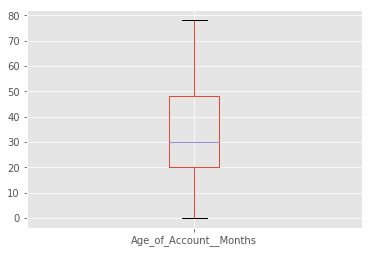

In [43]:
df3['Age_of_Account__Months'].plot.box()

** Create a kde plot of the 'd' column **

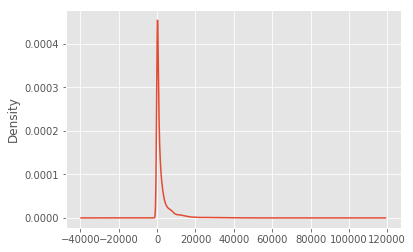

In [44]:
df3['Customer_Value'].plot.kde()

** Figure out how to increase the linewidth and make the linestyle dashed. (Note: You would usually not dash a kde plot line)**

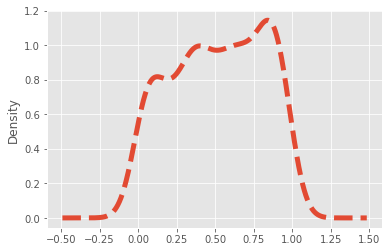

In [10]:
df3['d'].plot.density(lw=5,ls='--')

** Create an area plot of all the columns for just the rows up to 30. (hint: use .ix).**

Note, you may find this really hard, reference the solutions if you can't figure it out!
** Notice how the legend in our previous figure overlapped some of actual diagram. Can you figure out how to display the legend outside of the plot as shown below?**

** Try searching Google for a good stackoverflow link on this topic. If you can't find it on your own - [use this one for a hint.](http://stackoverflow.com/questions/23556153/how-to-put-legend-outside-the-plot-with-pandas)**

In [42]:
df3.groupby('Churn_Flag')['Average_Daily_Balance'].agg(['count','mean'])

,count,mean
Churn_Flag,,
N,229612,2851.724335
Y,15854,2896.355998


## Bivariate Analysis

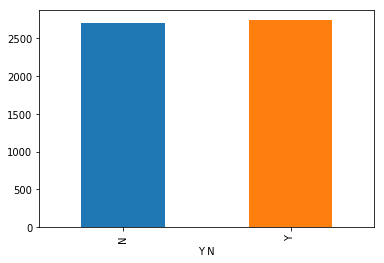

In [6]:
df3['Average_Daily_Balance'].groupby(df3['Churn_Flag']).mean().plot(kind='bar')
plt.show()

In [45]:
df3['Average_Daily_Balance'].describe()

count    245466.000000
mean       2854.606976
std        4662.333606
min           0.000000
25%         189.000000
50%         813.000000
75%        3459.000000
max       59367.000000
Name: Average_Daily_Balance, dtype: float64

In [46]:
def adb_cat(adb):
    if adb<200:
        return 1
    elif 200<=adb<800:
        return 2
    elif 800 <=adb<3500:
        return 3
    else:
        return 4   

In [47]:
df3['adb_cat'] = df3['Average_Daily_Balance'].apply(adb_cat)

In [48]:
df3.head()

,cust_id,Churn_Flag,Churn_Num,Average_Daily_Balance,Interest_Paid,Cash_Advances,Balance_Transferred,Marital_Status,Occupation_Group,Age_of_Account__Months,Age_Group,LTV_Group,Bill_Cycle,Customer_Type,Gender,Customer_Value,Credit_Limit,churn,adb_cat
0,37603,N,0,1572,393.00,1153,427.290,Unmarried,Manufacturing,56.0,41.0,Very_Bad,18,ORDRY,M,410.1450,11000,0,3
1,234702,N,0,7431,0.00,0,0.000,Other,Other,10.0,41.0,Good,21,ORDRY,U,0.0000,4000,0,4
2,42765,N,0,888,295.98,11405,5464.105,Other,Other,54.0,41.0,Others,11,SMCOA,M,2880.0425,17000,0,3
3,254622,Y,1,156,130.02,0,0.000,Other,Other,8.0,41.0,Good,21,ORDRY,U,65.0100,12000,1,1
4,85604,N,0,123,30.75,8503,3045.835,Other,Other,8.0,41.0,Others,18,DROAM,U,1538.2925,18000,0,1


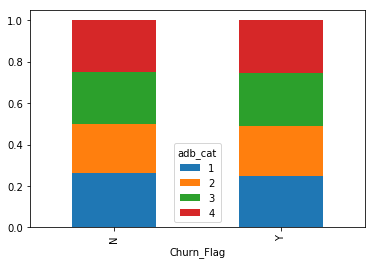

In [53]:
adb=pd.crosstab(df3['Churn_Flag'], df3['adb_cat'], normalize=0)
adb.plot.bar(stacked=True)

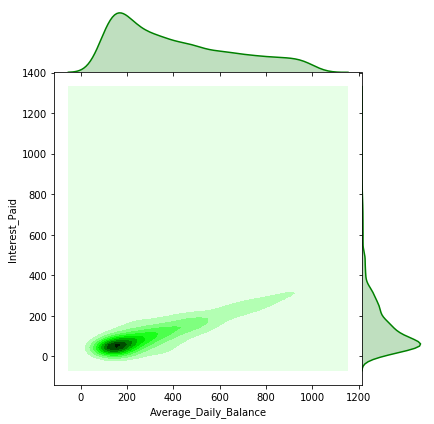

In [13]:
df4 = df3.sample(n=10000)
df4 = df4[(df4['Average_Daily_Balance']>100) & (df4['Average_Daily_Balance']<1000)]
sns.jointplot("Average_Daily_Balance", "Interest_Paid", data=df4, kind="kde",space=0,color='g')
#sns.jointplot("Average_Daily_Balance", "Interest_Paid", data=df4, kind="reg",space=0.2,color='g')

E:\Anaconda3\envs\krs\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\Anaconda3\envs\krs\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


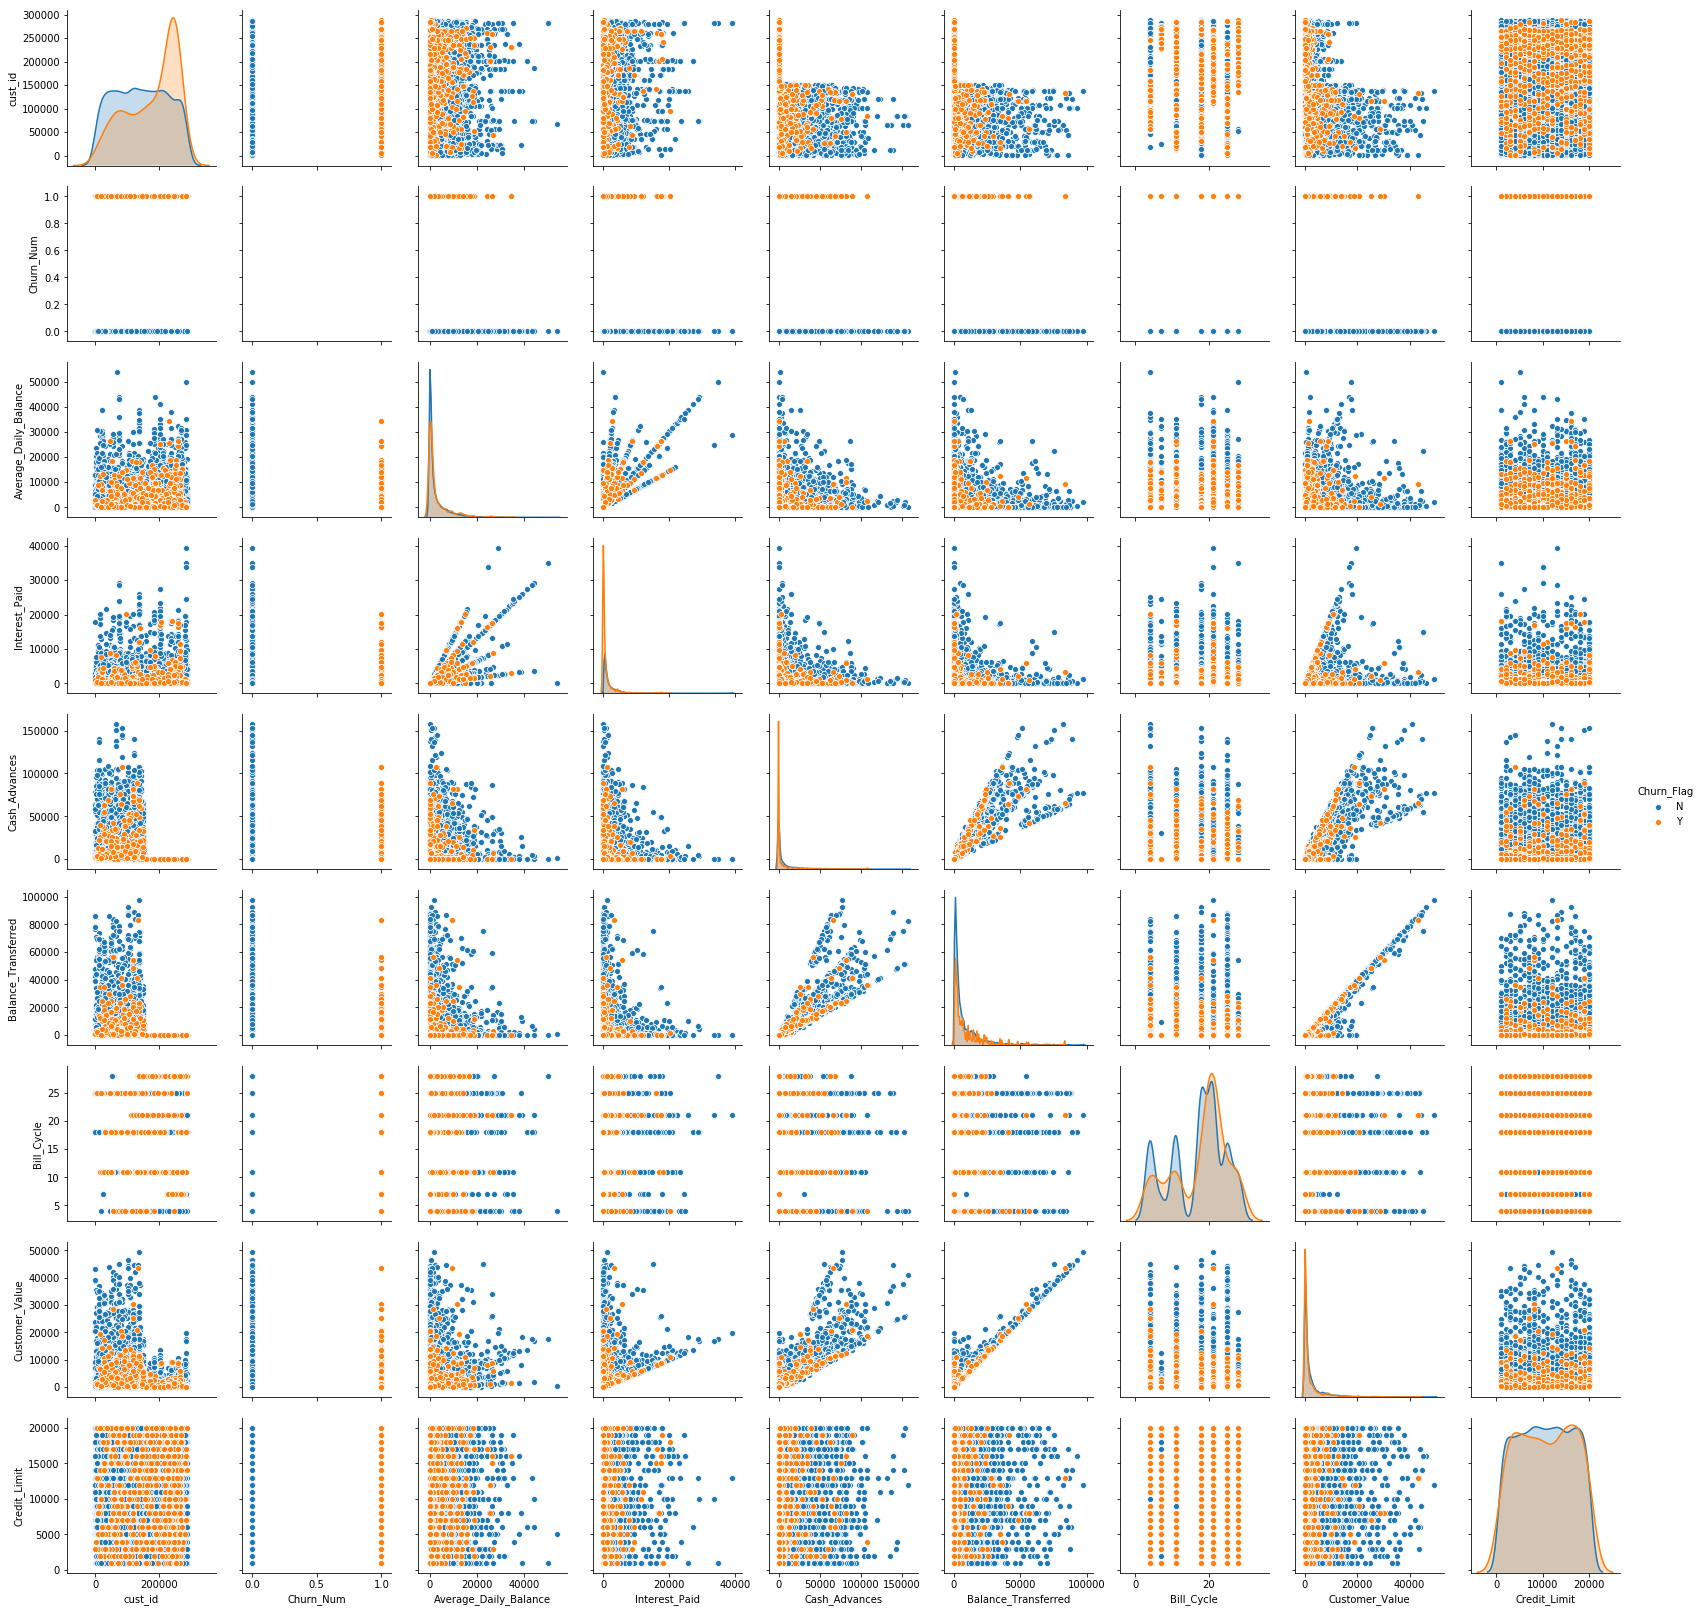

In [15]:
df4 = df3.sample(n=10000)
sns.pairplot(data=df4, hue='Churn_Flag')